In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.datasets import make_blobs
from sklearn.feature_selection import  f_classif
from sklearn import decomposition
from sklearn.cluster import KMeans,AgglomerativeClustering,MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score,calinski_harabasz_score
import scipy.cluster.hierarchy as sch
from itertools import cycle  # python自带的迭代器模块
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from scipy.stats.kde import gaussian_kde  # ,multivariate_normal

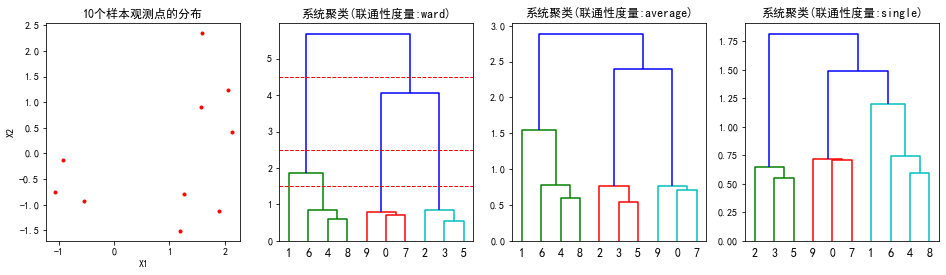

In [2]:
N=10
centers = [[1, 1], [-1, -1], [1, -1]]
X, lables_true = make_blobs(n_samples=N, centers= centers, cluster_std=0.6,random_state = 0)
fig=plt.figure(figsize=(16,4))
plt.subplot(1,4,1) 
plt.plot(X[:,0], X[:,1],'r.')
plt.title("%d个样本观测点的分布"%N)
plt.xlabel("X1")
plt.ylabel("X2")

linkages = ['ward', 'average', 'single']
for i,method in enumerate(linkages):
    plt.subplot(1,4,i+2) 
    sch.dendrogram(sch.linkage(X, method=method))  
    if i==0:
        plt.axhline(y=1.5,color='red', linestyle='--',linewidth=1)
        plt.axhline(y=2.5,color='red', linestyle='--',linewidth=1)
        plt.axhline(y=4.5,color='red', linestyle='--',linewidth=1)        
    plt.title('系统聚类(联通性度量:%s)' % method)    
plt.show()

代码说明：
（1）第1至3行：生成样本量N=10的聚类模拟数据。该数据包含3个小类，各小类的类中心依次为：(1,1),(-1,-1),(1,-1)。后续将验证系统聚类是否可以将数据正确聚成3个小类。
（2）第4至9行：绘制模拟聚类数据的散点图，如图11.8左图所示。
（3）第11行：指定系统聚类中的连通性度量，将依次采用ward方法，组间平均连锁法和最近邻法。
（4）第12至19行：利用for循环分别采用三种联通性度量，对模拟数据进行系统聚类并绘制聚类树形图。


In [3]:
AC = AgglomerativeClustering(linkage='ward',n_clusters =3)
AC.fit(X)
AC.children_

array([[ 3,  5],
       [ 4,  8],
       [ 0,  7],
       [ 9, 12],
       [ 2, 10],
       [ 6, 11],
       [ 1, 15],
       [13, 14],
       [16, 17]], dtype=int64)

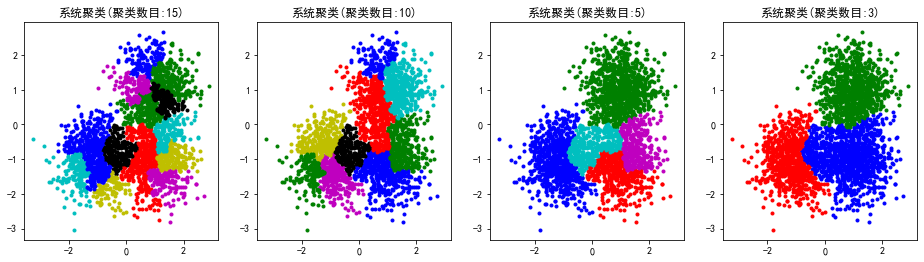

In [4]:
N=3000
centers = [[1, 1], [-1, -1], [1, -1]]
X, lables_true = make_blobs(n_samples=N, centers= centers, cluster_std=0.6,random_state=0)
fig=plt.figure(figsize=(16,4))
clusters=[15,10,5,3]
for i,n_clusters_ in enumerate(clusters):
    AC = AgglomerativeClustering(linkage='ward',n_clusters = n_clusters_)
    AC.fit(X)
    lables = AC.labels_
    plt.subplot(1,4,i+1) 
    colors = cycle('bgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        plt.plot(X[lables == k, 0], X[lables == k,1], col + '.')
    plt.title('系统聚类(聚类数目:%d)' % n_clusters_)
plt.show()

Text(0.5, 1.0, '碎石图')

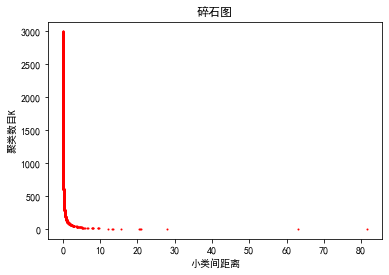

In [5]:
tmp=sch.linkage(X, method='ward')
gData=list(tmp[:,2])
gData.reverse()
fig=plt.figure(figsize=(6,4))
plt.scatter(gData ,range(1,N),c='r',s=1)
plt.xlabel("小类间距离")
plt.ylabel("聚类数目K")
plt.title("碎石图")

代码说明：
（1）第1行：利用函数linkage()得到所有聚类数目K下的所有聚类解。
（2）第2行：聚类解的第3列存储着“凝聚”成K=1,2,…N-1时的类间距离。距离越小“凝聚”在一起越合理。
（3）第3行：将第2行的距离结果反转成“凝聚”成K=N-1,N-2,…1时的类间距离，为绘制碎石图做准备。
（4）第4至8行：绘制碎石图，横坐标为距离，纵坐标为聚类数目K


Text(0, 0.5, 'X2')

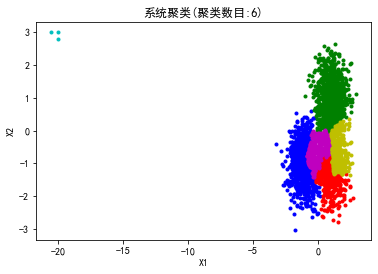

In [6]:
outs=[[-20,3],[-20,2.8],[-20.5,3]]
T=np.vstack((X,outs))  #探索异常点
K=6
AC = AgglomerativeClustering(linkage='ward',n_clusters = K)
AC.fit(T)
lables = AC.labels_
fig=plt.figure(figsize=(6,4))
colors = cycle('bgrcmyk')
for k, col in zip(range(K),colors):
    plt.plot(T[lables == k, 0], T[lables == k,1], col + '.')
plt.title('系统聚类(聚类数目:%d)' % K)
plt.xlabel("X1")
plt.ylabel("X2")   


代码说明：
（1）第1行：设置3个离群点的坐标。
（2）第2行：将3个离群点添加到数据集中。
（3）第3至5行：利用系统聚类将数据聚成6类。
（4）第8至13行：可视化系统聚类结果